#Setting

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,116 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and d

In [2]:
!pip install cvxopt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cvxopt as opt#최적화를 위해 사용하는 패키지
from cvxopt import solvers
import warnings

# 경고 메세지를 띄우고 싶지 않다면 아래 주석 제거
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [5]:
data = pd.read_excel("/content/drive/MyDrive/빅데이터 핀테크 전문가/로보어드바이저/ETF 과제/수정주가.xlsx")
data.head()

,D A T E,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,...,KBSTAR 대형고배당10TR,KINDEX 싱가포르리츠,KOSEF 코스닥150,TIGER 골드선물(H),KBSTAR KRX300미국달러선물혼합,KINDEX 스마트퀄리티,KINDEX 스마트로우볼,KINDEX 스마트하이베타,HANARO e커머스,HANARO 고배당
0,2008-01-02,20269,20727,11495,8876,6826,32556,8896,10608,8646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,20247,20788,11388,8777,7036,32548,8788,10589,8584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-01-04,20341,20845,10958,8802,6826,32671,8800,10608,8700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-01-07,19929,20475,10654,8673,6780,31960,8655,10340,8514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-01-08,19861,20418,10586,8594,6734,31823,8589,10275,8382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.set_index('D A T E',inplace = True)

#EDA

##Stock

In [7]:
stock = data.filter(regex='동일')

In [8]:
stock.describe()

,KINDEX 삼성그룹동일가중,TIGER 200동일가중,KODEX 200동일가중,ARIRANG 200동일가중
count,2120.000000,638.000000,638.000000,235.000000
mean,11389.524057,10348.601881,10357.960815,9143.936170
std,1283.468529,609.548600,595.849896,466.404615
min,8939.000000,8930.000000,8920.000000,7995.000000
25%,10448.000000,9820.250000,9842.250000,8795.000000
50%,11419.000000,10397.500000,10395.000000,9215.000000
75%,11942.500000,10853.000000,10852.000000,9347.500000
max,14540.000000,12001.000000,12015.000000,10280.000000


In [9]:
holding_periods=1
returns_s  = stock.pct_change(holding_periods).iloc[holding_periods:]
exp_rets = returns_s.mean() * 252 # average return -- > APR(annual percentage rate)
exp_rets.sort_values(ascending=False).head(30)

KINDEX 삼성그룹동일가중    0.052770
TIGER 200동일가중      0.036555
KODEX 200동일가중      0.029347
ARIRANG 200동일가중   -0.099611
dtype: float64

##STOCK EDA

In [10]:
holding_periods=1
returns  = data.pct_change(holding_periods).iloc[holding_periods:]
returns.head()#전체 수익률

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,...,KBSTAR 대형고배당10TR,KINDEX 싱가포르리츠,KOSEF 코스닥150,TIGER 골드선물(H),KBSTAR KRX300미국달러선물혼합,KINDEX 스마트퀄리티,KINDEX 스마트로우볼,KINDEX 스마트하이베타,HANARO e커머스,HANARO 고배당
D A T E,,,,,,,,,,,,,,,,,,,,,
2008-01-03,-0.001085,0.002943,-0.009308,-0.011154,0.030765,-0.000246,-0.012140,-0.001791,-0.007171,-0.020610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,0.004643,0.002742,-0.037759,0.002848,-0.029847,0.003779,0.001365,0.001794,0.013514,0.002930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,-0.020255,-0.017750,-0.027742,-0.014656,-0.006739,-0.021762,-0.016477,-0.025264,-0.021379,-0.011687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,-0.003412,-0.002784,-0.006383,-0.009109,-0.006785,-0.004287,-0.007626,-0.006286,-0.015504,0.019618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-09,0.006445,0.004702,0.010486,-0.002909,-0.002673,0.006976,-0.000931,0.010803,0.001790,-0.010807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
temp = data.filter(regex='MSCI')
holding_periods=1
returns_temp  = temp.pct_change(holding_periods).iloc[holding_periods:]
returns_temp.head()#일부 수익률

,KODEX MSCI Korea,TIGER 미국MSCI리츠(합성 H),ARIRANG 글로벌MSCI(합성 H),ARIRANG 선진국MSCI(합성 H),ARIRANG 신흥국MSCI(합성 H),SMART 선진국MSCI World(합성 H),TIGER 이머징마켓MSCI레버리지(합성 H),KODEX 선진국MSCI World,KINDEX 인도네시아MSCI(합성),KINDEX 필리핀MSCI(합성),...,KODEX MSCI밸류,KODEX MSCI퀄리티,KODEX MSCI Korea TR,KODEX MSCI KOREA ESG유니버설,TIGER MSCI KOREA ESG유니버설,TIGER MSCI KOREA ESG리더스,KINDEX 멕시코MSCI(합성),KODEX MSCI EM선물(H),KBSTAR 중국MSCI China선물(H),TIGER MSCI Korea TR
D A T E,,,,,,,,,,,,,,,,,,,,,
2008-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
exp_rets = returns_temp.mean() * 252 # average return -- > APR(annual percentage rate)
exp_rets.sort_values(ascending=False).head(60)

KBSTAR 중국MSCI China선물(H)     0.323674
TIGER MSCI Korea TR          0.172919
TIGER 이머징마켓MSCI레버리지(합성 H)    0.139648
KODEX 선진국MSCI World          0.130051
KINDEX 러시아MSCI(합성)           0.109911
TIGER 미국MSCI리츠(합성 H)         0.100316
SMART 선진국MSCI World(합성 H)    0.070263
ARIRANG 글로벌MSCI(합성 H)        0.059739
KODEX MSCI Korea             0.047164
ARIRANG 신흥국MSCI(합성 H)        0.026076
KINDEX 인도네시아MSCI(합성)         0.024642
ARIRANG 선진국MSCI(합성 H)        0.017908
KINDEX 필리핀MSCI(합성)           0.017019
KINDEX 멕시코MSCI(합성)          -0.013501
KODEX MSCI퀄리티               -0.030381
KODEX MSCI밸류                -0.030381
KODEX MSCI모멘텀               -0.041469
TIGER MSCI KOREA ESG리더스     -0.050056
TIGER MSCI KOREA ESG유니버설    -0.066389
KODEX MSCI EM선물(H)          -0.066575
KODEX MSCI KOREA ESG유니버설    -0.067762
KODEX MSCI Korea TR         -0.079063
dtype: float64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


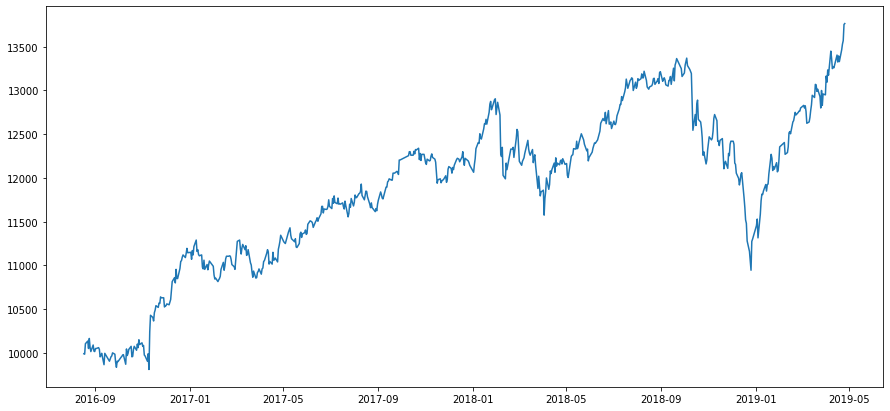

In [13]:
plt.figure(figsize=(15,7))
plt.plot(data['KODEX 선진국MSCI World'])
plt.show()

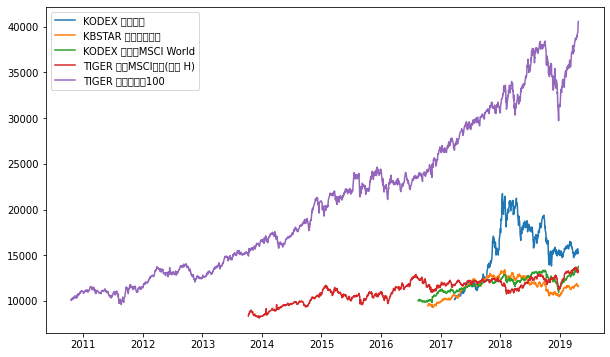

In [14]:
stock_list = ['KODEX 헬스케어','KBSTAR 모멘텀로우볼','KODEX 선진국MSCI World','TIGER 미국MSCI리츠(합성 H)','TIGER 미국나스닥100']
plt.figure(figsize=(10,6))
plt.plot(data[stock_list])
plt.legend(stock_list)
plt.show()

In [15]:
#수익률 데이터 중 위험자산 2개, 무위험자산 1개 선택
bt=returns[['TIGER 미국나스닥100','KODEX 헬스케어']]#기술주 조합
# bt=returns[['KODEX 선진국MSCI World','TIGER 유로스탁스배당30']]#MSCI+고배당
# bt=returns[['KBSTAR 모멘텀로우볼','KODEX 선진국MSCI World']]#MSCI + 모멘텀
# bt=returns[['KODEX 선진국MSCI World','TIGER 미국나스닥100']]#MSCI+나스닥

##MVF

In [16]:
holding_periods=1
n_term=252 # dailiy return을 annualize

In [17]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
    n = len(cov_mat)

    # Objective function
    # min (1/2)*w.T*P*w
    P = opt.matrix(cov_mat.values) 
    q = opt.matrix(0.0, (n, 1))

    # Constraints Gw <= h
    # exp_rets*w >= target_ret and w >= 0
    G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
    h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

    # Constraints Aw = b
    # sum(w) = 1
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Solve
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    # Put weights into a labeled series
    w = pd.Series(sol['x'], index=cov_mat.index)

    return w

In [18]:
exp_rets = bt.mean() * n_term # average return -- > APR(annual percentage rate)
exp_rets

TIGER 미국나스닥100    0.180244
KODEX 헬스케어        0.249462
dtype: float64

In [19]:
cov_mat = bt.cov() * n_term # covariance
cov_mat

,TIGER 미국나스닥100,KODEX 헬스케어
TIGER 미국나스닥100,0.026921,0.006769
KODEX 헬스케어,0.006769,0.096872


In [20]:
corr_mat = bt.corr()

In [21]:
corr_mat.style.background_gradient(cmap='coolwarm')

,TIGER 미국나스닥100,KODEX 헬스케어
TIGER 미국나스닥100,1.000000,0.127241
KODEX 헬스케어,0.127241,1.000000


In [22]:
max_risk= 0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(0, n_step+1):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))

    if risk > max_risk:
        break

    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)

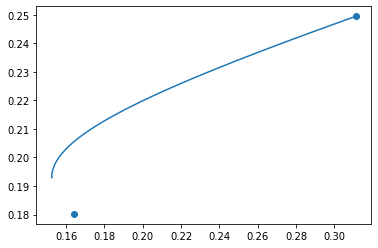

In [23]:
plt.plot(risks, rets)

var = np.diag(cov_mat)
plt.scatter(np.sqrt(var), exp_rets)

plt.show()

##최소 분산 포트폴리오

In [24]:
# Efficient Frontier

max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []
weights = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)
    weights.append(_w)

min_risk_idx = np.argmin(risks)#risks.index(min(risks))

In [25]:
risks[min_risk_idx]

0.15243931660680915

In [26]:
min_risk_idx = np.argmin(risks)
min_risk = min(risks)
min_risk_ret = rets[min_risk_idx]
min_risk_weight = weights[min_risk_idx]
print("Risk of minimum variance portfolio : ", min_risk)
print("Return of minimum variance portfolio : ", min_risk_ret)
print("Weight of minimum variance portfolio")
print(min_risk_weight)

Risk of minimum variance portfolio :  0.15243931660680915
Return of minimum variance portfolio :  0.19289565499947312
Weight of minimum variance portfolio
TIGER 미국나스닥100    0.817223
KODEX 헬스케어        0.182777
dtype: float64


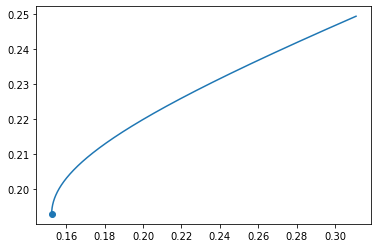

In [27]:
plt.plot(risks, rets)
plt.scatter(min_risk,min_risk_ret)
plt.show()

##탄젠시 포트폴리오

In [28]:
# Efficient Frontier

max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []
weights = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)
    weights.append(_w)


rf_rate = 0.05

slopes = []


for i in range(len(rets)):
  slope_ = (rets[i]-rf_rate)/risks[i]
  slopes.append(slope_)

max_tangency_idx = np.argmax(slopes)
max_tangency = slopes[max_tangency_idx]


In [29]:
max_tangency_risk = risks[max_tangency_idx]
max_tangency_return = rets[max_tangency_idx]
max_tangency_weight = weights[max_tangency_idx]
print("Risk of tangency variance portfolio : ", max_tangency_risk)
print("Return of tangency variance portfolio : ", max_tangency_return)
print("Weight of tangency variance portfolio")
print(max_tangency_weight)

Risk of tangency variance portfolio :  0.15617303116493186
Return of tangency variance portfolio :  0.19997174082622748
Weight of tangency variance portfolio
TIGER 미국나스닥100    0.714994
KODEX 헬스케어        0.285006
dtype: float64


In [30]:
ys = []
for i in range(len(risks)):
  ys.append(max_tangency*risks[i]+rf_rate)

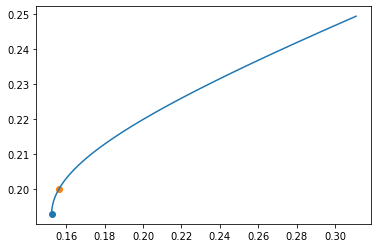

In [31]:
plt.plot(risks, rets)
# plt.plot(risks, ys)
plt.scatter(min_risk,min_risk_ret)
plt.scatter(max_tangency_risk,max_tangency_return)
plt.show()

In [32]:
sharp = (rets[max_tangency_idx]-rf_rate)/risks[max_tangency_idx]
print("Sharp Ratio : {}".format(sharp))

Sharp Ratio : 0.9602921817393985


#백테스팅

###Setting

In [ ]:
def create_data(data):
    
    result = data.pct_change(20).iloc[20:]
    
    returns = result
    avg_rets = returns.mean()*12
    cov_mat = returns.cov()*12

    return returns, cov_mat, avg_rets

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
    n = len(cov_mat)

    # Objective function
    # min (1/2)*w.T*P*w
    P = opt.matrix(cov_mat.values) 
    q = opt.matrix(0.0, (n, 1))


    # Constraints Gw <= h
    # exp_rets*w >= target_ret and w >= 0
    G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
    h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

    # Constraints Aw = b
    # sum(w) = 1
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Solve
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    # Put weights into a labeled series
    w = pd.Series(sol['x'], index=cov_mat.index)

    return w

In [ ]:
def tangency_portfolio(cov_mat, exp_rets, target_ret, min_rets, max_rets, rf_rate = 0.01):
    
    n = len(cov_mat)
    P = opt.matrix(cov_mat.values)
    q = opt.matrix(0.0, (n, 1))
    
    tangency_queue = []
    weights_queue = []
    return_queue = []
    cov_queue = []
    
    step = (max_rets - min_rets)/100
    for i in range(100):
                
        try:
        
            target_ret = min_rets + (i * step)

            # Constraints Gx <= h

            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

            # Constraints Ax = b
            # sum(x) = 1
            A = opt.matrix(1.0, (1, n))
            b = opt.matrix(1.0)

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)

            if sol['status'] != 'optimal':
                pass

            # Put weights into a labeled series
            weights = pd.Series(sol['x'], index=cov_mat.index)
            
            tangency_ = (np.dot(exp_rets, weights) - rf_rate) / np.sqrt(np.dot(np.dot(weights, cov_mat), weights))
            tangency_queue.append(tangency_)
            weights_queue.append(weights)
            return_queue.append(np.dot(exp_rets, weights))
            cov_queue.append(np.sqrt(np.dot(np.dot(weights, cov_mat), weights)))
        
        except:
            pass

    
    tan_index = tangency_queue.index(max(tangency_queue))   
    weights = weights_queue[tan_index]

    return weights

In [ ]:
def back_test(data, ret):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.
    total_days = data.shape[0]
    
    # Rebalancing을 한 달마다 진행하는 경우, 'M'으로 rebalance_period는 20이 된다.
    rebalance_period = rb # 8주에 한번(FOMC)
    window_size = ws # 지난 6개월

    returns, cov_mat, avg_rets= create_data(data)
    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = (total_days - window_size) // rebalance_period
    w = []
    rebalancing_date=[]
    original_weights = []
    
    rebal = rb
    for i in range(window_size, total_days):
        # 리밸런싱을 할 때 마다 Tangency portfolio weight를 새로 구해야 한다.
        # 이때 리밸런싱 시점 이전의 총 120일 간의 데이터를 사용한다.
        
        if rebal % rebalance_period == 0:
            #print('rebalance')
            _returns, _cov_mat, _avg_rets= create_data(data[(i-window_size):i])
            rebalancing_date.append(data.index[i:i+1]) # rebalance_period 씩 늘려가자
            rebal = 0
            _target_ret = _avg_rets.quantile(0.7)
            _min_ret = _avg_rets.min()
            _max_ret = _avg_rets.max()
            _w = tangency_portfolio(_cov_mat, _avg_rets, _target_ret, _min_ret, _max_ret)
            print(n_rebalance)
            n_rebalance = n_rebalance - 1
            print(_w)
            _w.plot.bar()
            plt.show()
            plt.close()
            _w = np.asarray(_w.values) #np.array([0.0, 0.0, 1.0, 0.0, 0.0])
            w.append(_w)
            

        rebal = rebal + 1
        
    
    price = data
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 data를 저장한다.
    portfolio_value = 10000
    port_each_money = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    rebal = rb
    j = 0
    for i in range(window_size, total_days):
        
        if i == window_size: # 초기화
            port_each_money = portfolio_value * w[j]
            rebal = 1
            # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
            portfolio_value = port_each_money.sum()
            # port에 portfolio_value를 저장하여 준다.
            port.append(portfolio_value)
            j = j+1


        else:
            #각 날마다 자산의 가격이 바뀌므로, port_each_money 변화한다.
            port_each_money = port_each_money * (1+ret.iloc[i])
            portfolio_value = port_each_money.sum()
            if rebal % rebalance_period == 0:
                rebal = 0
                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_each_money = portfolio_value * w[j]
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                j = j+1
            
            else:
                # 리밸런싱 날짜가 아닌 평범함 날짜. 
                # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
            
        rebal = rebal + 1
        port_date.append(data.index[i:i+1][0])
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, rebalancing_date

##Back Testing - 나스닥&헬스케어

In [ ]:
data_bt = data['2017-04-26':'2019-04-26'][['TIGER 미국나스닥100','KODEX 헬스케어','KOSEF 단기자금']]
data_bt.head(10)

,TIGER 미국나스닥100,KODEX 헬스케어,KOSEF 단기자금
D A T E,,,
2017-04-26,27935.0,10610.0,98225.0
2017-04-27,28063.0,10585.0,98245.0
2017-04-28,28266.0,10570.0,98254.0
2017-05-02,28484.0,10545.0,98269.0
2017-05-04,28489.0,10535.0,98284.0
2017-05-08,28563.0,11015.0,98288.0
2017-05-10,28840.0,11025.0,98293.0
2017-05-11,28667.0,11195.0,98303.0
2017-05-12,28583.0,11120.0,98298.0


In [ ]:
data_bt.dropna()

,TIGER 미국나스닥100,KODEX 헬스케어,KOSEF 단기자금
D A T E,,,
2017-04-26,27935.0,10610.0,98225.0
2017-04-27,28063.0,10585.0,98245.0
2017-04-28,28266.0,10570.0,98254.0
2017-05-02,28484.0,10545.0,98269.0
2017-05-04,28489.0,10535.0,98284.0
...,...,...,...
2019-04-22,39330.0,15710.0,101325.0
2019-04-23,39425.0,15700.0,101330.0
2019-04-24,39985.0,15520.0,101335.0


In [ ]:
ret = data_bt.pct_change().iloc[1:]

In [ ]:
data_bt.shape

(487, 3)

14
TIGER 미국나스닥100    0.000430
KODEX 헬스케어        0.000839
KOSEF 단기자금        0.998731
dtype: float64


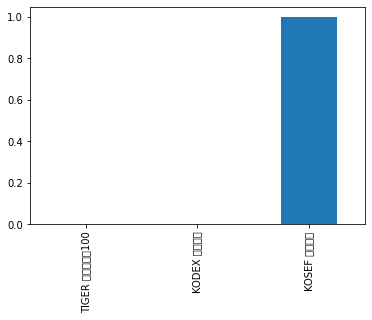

13
TIGER 미국나스닥100    0.034920
KODEX 헬스케어        0.000769
KOSEF 단기자금        0.964310
dtype: float64


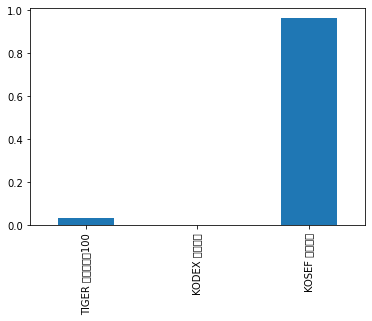

12
TIGER 미국나스닥100    0.004759
KODEX 헬스케어        0.019102
KOSEF 단기자금        0.976138
dtype: float64


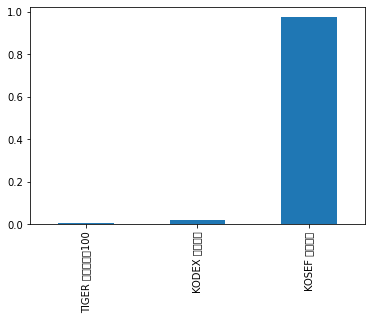

11
TIGER 미국나스닥100    0.230798
KODEX 헬스케어        0.768872
KOSEF 단기자금        0.000331
dtype: float64


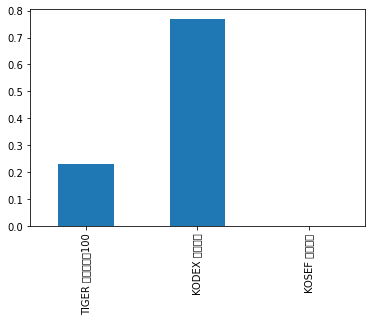

10
TIGER 미국나스닥100    0.000050
KODEX 헬스케어        0.000047
KOSEF 단기자금        0.999903
dtype: float64


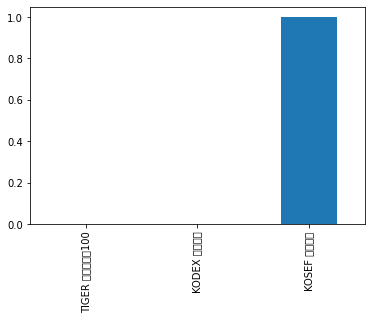

9
TIGER 미국나스닥100    0.000321
KODEX 헬스케어        0.000013
KOSEF 단기자금        0.999666
dtype: float64


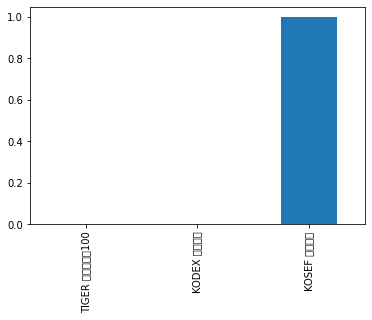

8
TIGER 미국나스닥100    0.000958
KODEX 헬스케어        0.000923
KOSEF 단기자금        0.998119
dtype: float64


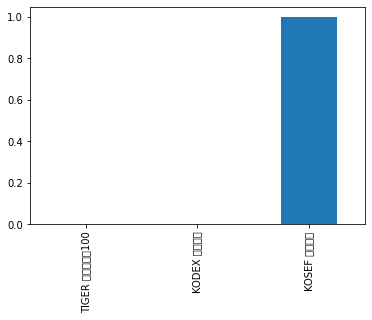

7
TIGER 미국나스닥100    0.001373
KODEX 헬스케어        0.000183
KOSEF 단기자금        0.998444
dtype: float64


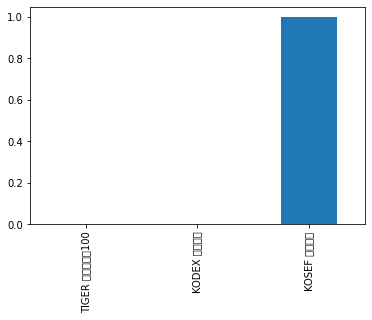

6
TIGER 미국나스닥100    0.004133
KODEX 헬스케어        0.000258
KOSEF 단기자금        0.995609
dtype: float64


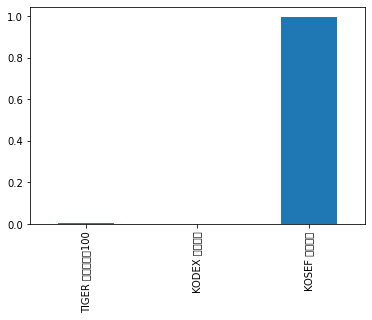

5
TIGER 미국나스닥100    0.001685
KODEX 헬스케어        0.000336
KOSEF 단기자금        0.997979
dtype: float64


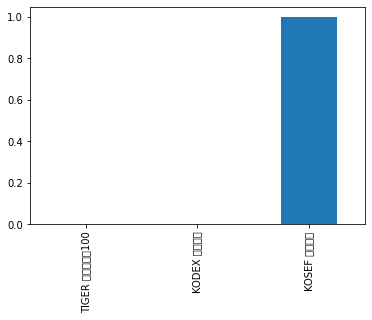

4
TIGER 미국나스닥100    0.000139
KODEX 헬스케어        0.000080
KOSEF 단기자금        0.999781
dtype: float64


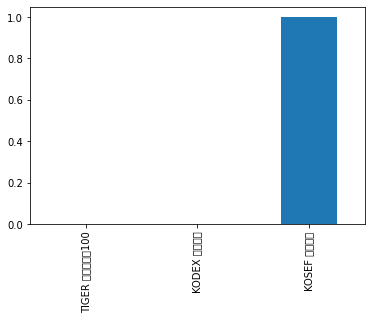

3
TIGER 미국나스닥100    0.000713
KODEX 헬스케어        0.000152
KOSEF 단기자금        0.999135
dtype: float64


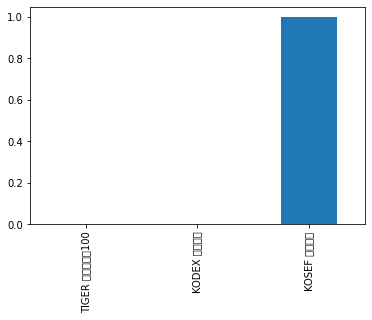

2
TIGER 미국나스닥100    0.000232
KODEX 헬스케어        0.003786
KOSEF 단기자금        0.995981
dtype: float64


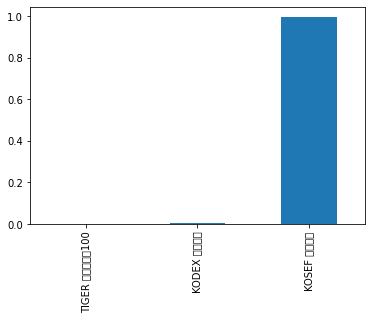

1
TIGER 미국나스닥100    0.002191
KODEX 헬스케어        0.003014
KOSEF 단기자금        0.994795
dtype: float64


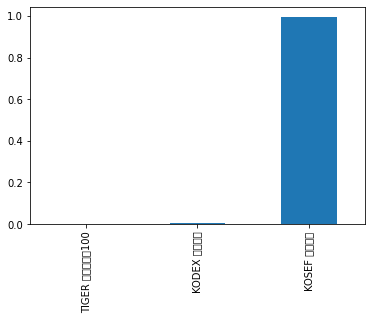

0
TIGER 미국나스닥100    0.000166
KODEX 헬스케어        0.000877
KOSEF 단기자금        0.998956
dtype: float64


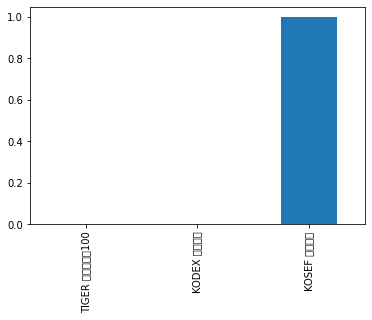

In [ ]:
#빠른 회전율
rb = 30
ws = 60
w_1, portfolio_1, rebalancing_date = back_test(data_bt[1:], ret)

6
TIGER 미국나스닥100    0.018043
KODEX 헬스케어        0.004117
KOSEF 단기자금        0.977840
dtype: float64


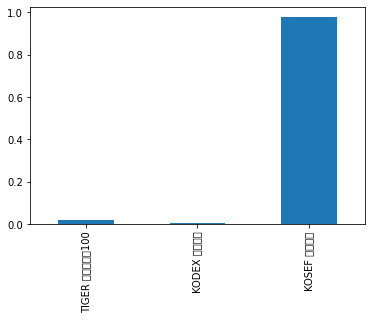

5
TIGER 미국나스닥100    0.040438
KODEX 헬스케어        0.014973
KOSEF 단기자금        0.944590
dtype: float64


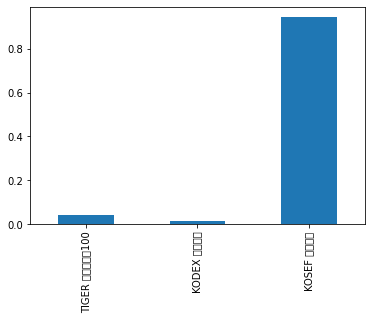

4
TIGER 미국나스닥100    0.000424
KODEX 헬스케어        0.000118
KOSEF 단기자금        0.999458
dtype: float64


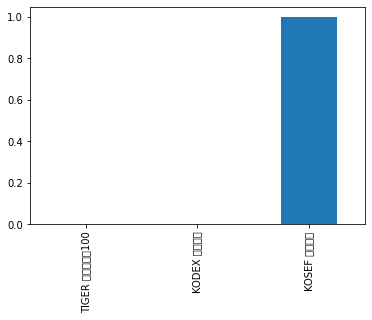

3
TIGER 미국나스닥100    0.000648
KODEX 헬스케어        0.000958
KOSEF 단기자금        0.998394
dtype: float64


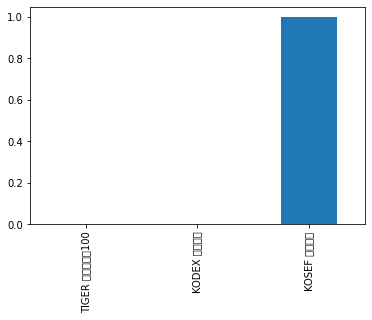

2
TIGER 미국나스닥100    0.000127
KODEX 헬스케어        0.000304
KOSEF 단기자금        0.999569
dtype: float64


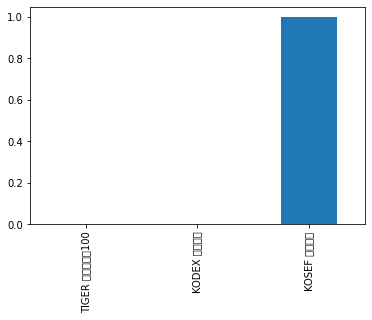

1
TIGER 미국나스닥100    0.000098
KODEX 헬스케어        0.000204
KOSEF 단기자금        0.999698
dtype: float64


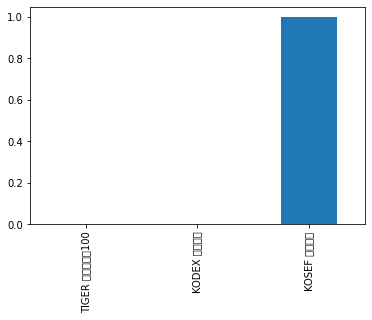

0
TIGER 미국나스닥100    0.000921
KODEX 헬스케어        0.002004
KOSEF 단기자금        0.997075
dtype: float64


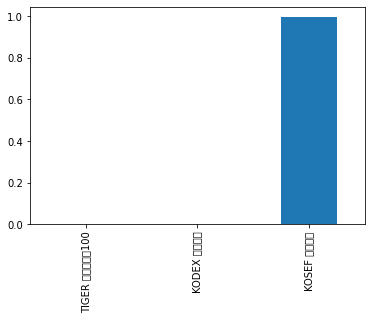

In [ ]:
#느린 회전율
rb = 60
ws = 120
w_2, portfolio_2, rebalancing_date = back_test(data_bt[1:], ret)

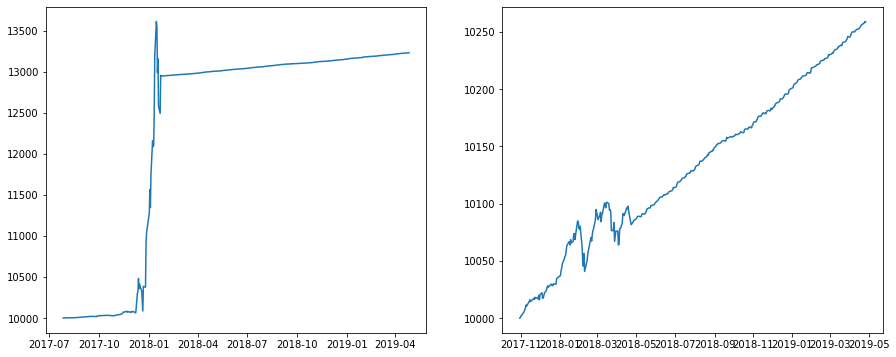

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(portfolio_1)
plt.subplot(1,2,2)
plt.plot(portfolio_2)

In [ ]:
p1_value = portfolio_1.values[-1][0]
p2_value = portfolio_2.values[-1][0]

In [ ]:
rate1 = (portfolio_1.values[-1][0]-10000)/10000*100
rate2 = (portfolio_2.values[-1][0]-10000)/10000*100
print("PF 1 - Rates Of Return : {:.2f}%\nPF 2 - Rates Of Return : {:.2f}%".format(rate1,rate2))

PF 1 - Rates Of Return : 32.31%
PF 2 - Rates Of Return : 2.59%


###Sharp Ratio

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


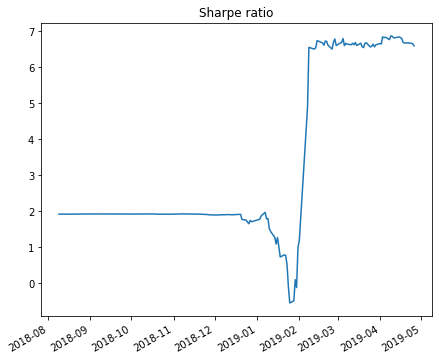

In [ ]:
new_port = portfolio_1
new_port['returns'] = new_port['portfolio_value'].pct_change(1)
# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    rf_rate = 0.01
    return (y.mean()*252 - rf_rate) / (y.std()*np.sqrt(252))

# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

plt.figure(figsize=(7,6))
new_port['rs'][252:].plot()
plt.title('Sharpe ratio')
plt.show()

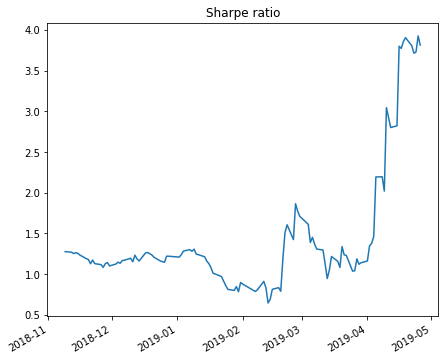

In [ ]:
new_port = portfolio_2
new_port['returns'] = new_port['portfolio_value'].pct_change(1)
# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    rf_rate = 0.01
    return (y.mean()*252 - rf_rate) / (y.std()*np.sqrt(252))

# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

plt.figure(figsize=(7,6))
new_port['rs'][252:].plot()
plt.title('Sharpe ratio')
plt.show()

##Back Testing - MSCI&모멘텀

In [ ]:
data_bt = data['2017-04-26':'2019-04-26'][['KBSTAR 모멘텀로우볼','KODEX 선진국MSCI World','KOSEF 단기자금']]
data_bt.head(10)

,KBSTAR 모멘텀로우볼,KODEX 선진국MSCI World,KOSEF 단기자금
D A T E,,,
2017-04-26,10771.0,11225.0,98225.0
2017-04-27,10761.0,11275.0,98245.0
2017-04-28,10776.0,11345.0,98254.0
2017-05-02,10914.0,11270.0,98269.0
2017-05-04,10988.0,11250.0,98284.0
2017-05-08,11278.0,11380.0,98288.0
2017-05-10,11136.0,11430.0,98293.0
2017-05-11,11239.0,11345.0,98303.0
2017-05-12,11190.0,11305.0,98298.0


In [ ]:
data_bt.dropna()

,KBSTAR 모멘텀로우볼,KODEX 선진국MSCI World,KOSEF 단기자금
D A T E,,,
2017-04-26,10771.0,11225.0,98225.0
2017-04-27,10761.0,11275.0,98245.0
2017-04-28,10776.0,11345.0,98254.0
2017-05-02,10914.0,11270.0,98269.0
2017-05-04,10988.0,11250.0,98284.0
...,...,...,...
2019-04-22,11665.0,13465.0,101325.0
2019-04-23,11690.0,13530.0,101330.0
2019-04-24,11640.0,13570.0,101335.0


In [ ]:
ret = data_bt.pct_change().iloc[1:]

In [ ]:
data_bt.shape

(487, 3)

14
KBSTAR 모멘텀로우볼          0.022793
KODEX 선진국MSCI World    0.017867
KOSEF 단기자금             0.959340
dtype: float64


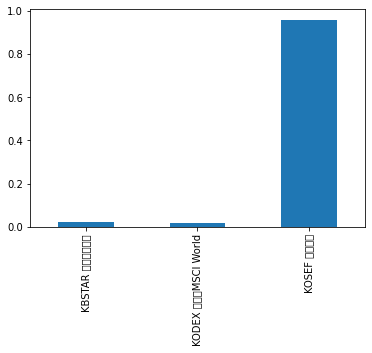

13
KBSTAR 모멘텀로우볼          0.000639
KODEX 선진국MSCI World    0.008796
KOSEF 단기자금             0.990565
dtype: float64


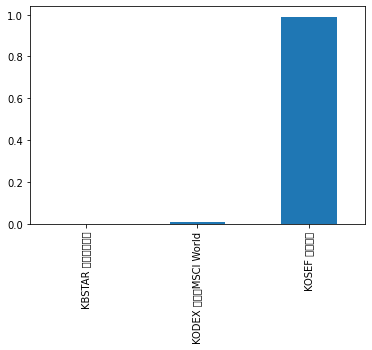

12
KBSTAR 모멘텀로우볼          0.000027
KODEX 선진국MSCI World    0.080468
KOSEF 단기자금             0.919505
dtype: float64


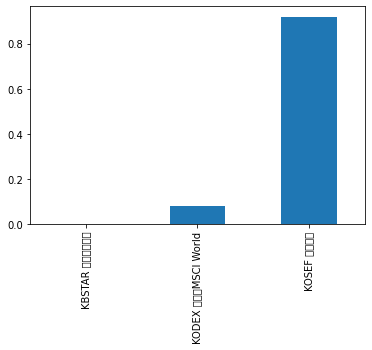

11
KBSTAR 모멘텀로우볼          9.889810e-01
KODEX 선진국MSCI World    9.117460e-07
KOSEF 단기자금             1.101805e-02
dtype: float64


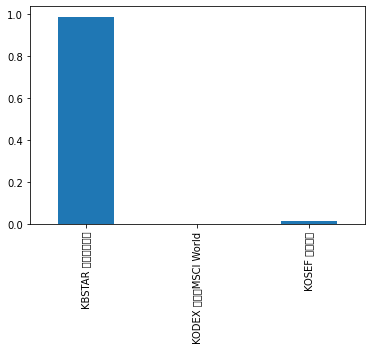

10
KBSTAR 모멘텀로우볼          0.000021
KODEX 선진국MSCI World    0.000036
KOSEF 단기자금             0.999943
dtype: float64


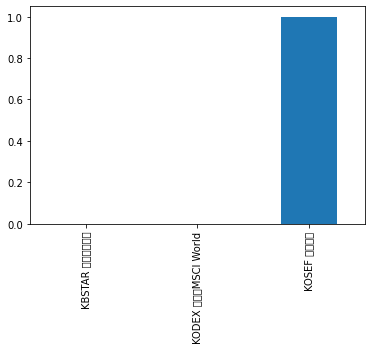

9
KBSTAR 모멘텀로우볼          0.000015
KODEX 선진국MSCI World    0.000039
KOSEF 단기자금             0.999947
dtype: float64


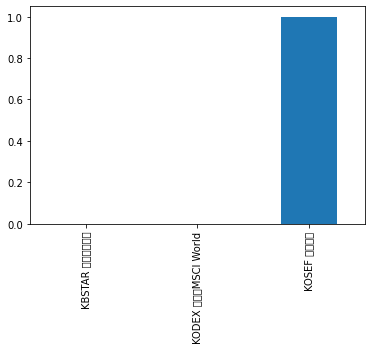

8
KBSTAR 모멘텀로우볼          0.002721
KODEX 선진국MSCI World    0.000033
KOSEF 단기자금             0.997247
dtype: float64


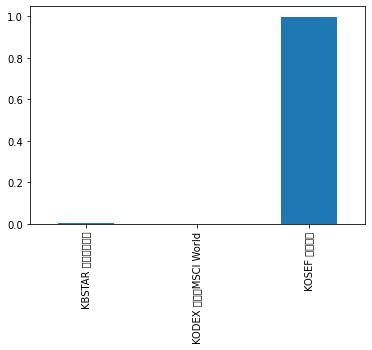

7
KBSTAR 모멘텀로우볼          0.000453
KODEX 선진국MSCI World    0.001618
KOSEF 단기자금             0.997929
dtype: float64


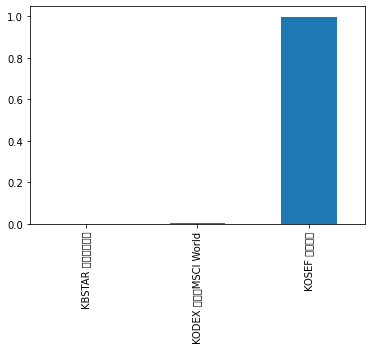

6
KBSTAR 모멘텀로우볼          0.000437
KODEX 선진국MSCI World    0.007904
KOSEF 단기자금             0.991658
dtype: float64


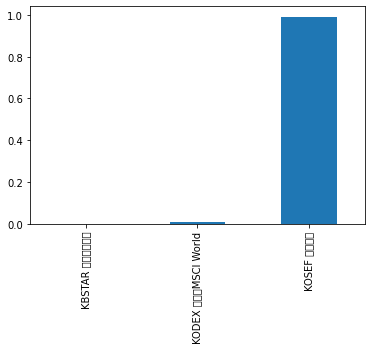

5
KBSTAR 모멘텀로우볼          0.002139
KODEX 선진국MSCI World    0.005310
KOSEF 단기자금             0.992550
dtype: float64


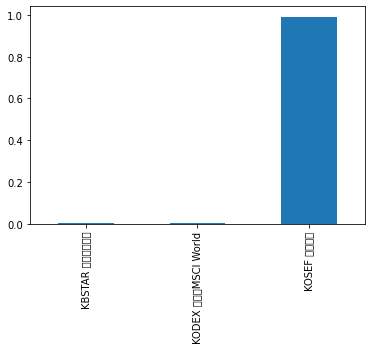

4
KBSTAR 모멘텀로우볼          0.000042
KODEX 선진국MSCI World    0.000827
KOSEF 단기자금             0.999132
dtype: float64


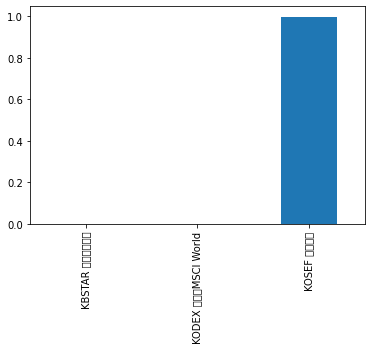

3
KBSTAR 모멘텀로우볼          0.000582
KODEX 선진국MSCI World    0.000058
KOSEF 단기자금             0.999359
dtype: float64


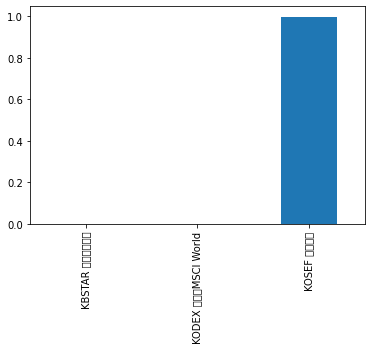

2
KBSTAR 모멘텀로우볼          0.001407
KODEX 선진국MSCI World    0.000154
KOSEF 단기자금             0.998439
dtype: float64


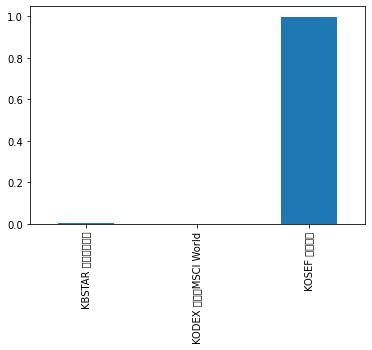

1
KBSTAR 모멘텀로우볼          0.001274
KODEX 선진국MSCI World    0.003155
KOSEF 단기자금             0.995571
dtype: float64


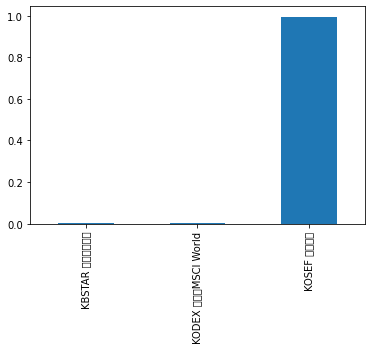

0
KBSTAR 모멘텀로우볼          0.000390
KODEX 선진국MSCI World    0.000986
KOSEF 단기자금             0.998624
dtype: float64


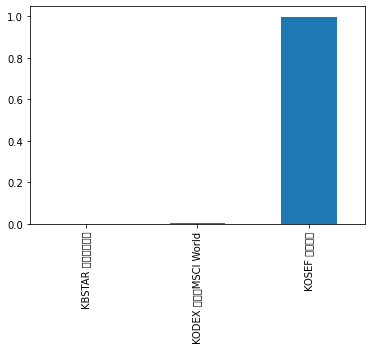

In [ ]:
#빠른 회전율
rb = 30
ws = 60
w_1, portfolio_1, rebalancing_date = back_test(data_bt[1:], ret)

6
KBSTAR 모멘텀로우볼          0.002570
KODEX 선진국MSCI World    0.026599
KOSEF 단기자금             0.970831
dtype: float64


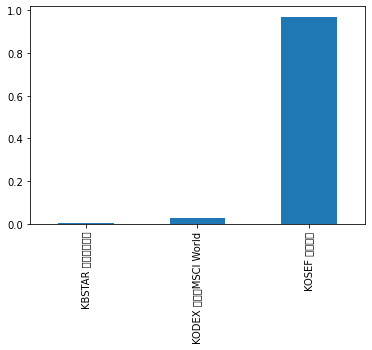

5
KBSTAR 모멘텀로우볼          0.012786
KODEX 선진국MSCI World    0.011042
KOSEF 단기자금             0.976172
dtype: float64


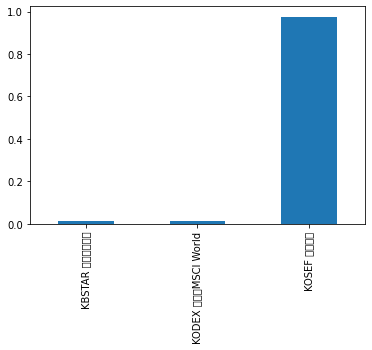

4
KBSTAR 모멘텀로우볼          0.000110
KODEX 선진국MSCI World    0.000067
KOSEF 단기자금             0.999824
dtype: float64


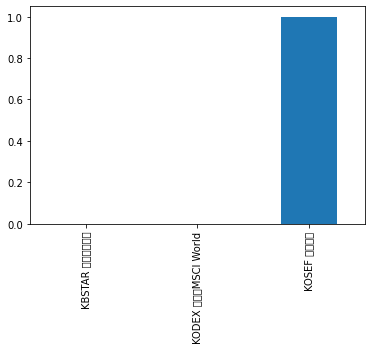

3
KBSTAR 모멘텀로우볼          0.000791
KODEX 선진국MSCI World    0.000276
KOSEF 단기자금             0.998934
dtype: float64


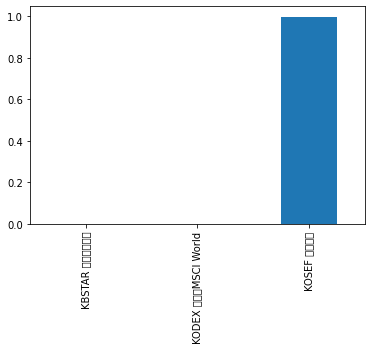

2
KBSTAR 모멘텀로우볼          0.000168
KODEX 선진국MSCI World    0.001142
KOSEF 단기자금             0.998690
dtype: float64


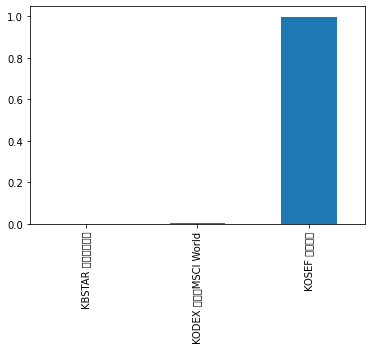

1
KBSTAR 모멘텀로우볼          0.000267
KODEX 선진국MSCI World    0.000224
KOSEF 단기자금             0.999509
dtype: float64


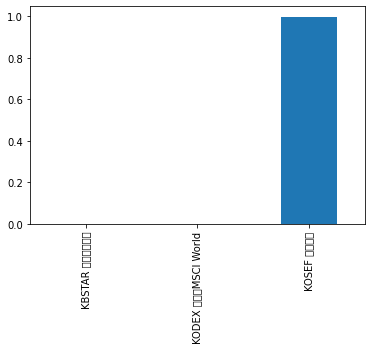

0
KBSTAR 모멘텀로우볼          0.000638
KODEX 선진국MSCI World    0.000797
KOSEF 단기자금             0.998566
dtype: float64


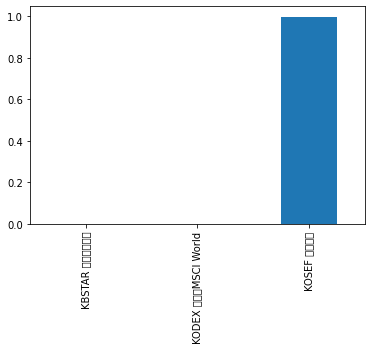

In [ ]:
#느린 회전율
rb = 60
ws = 120
w_2, portfolio_2, rebalancing_date = back_test(data_bt[1:], ret)

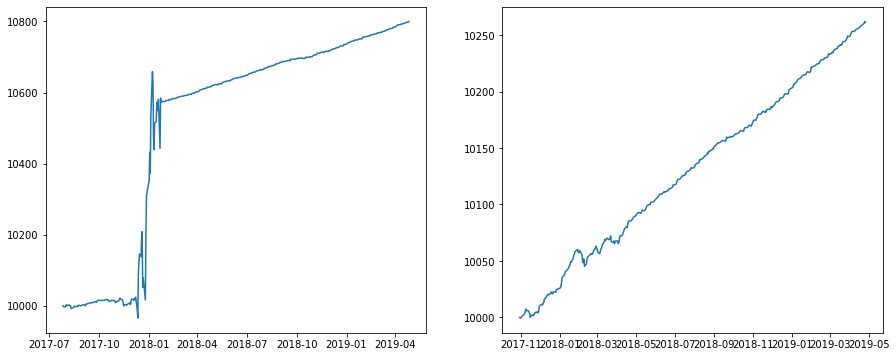

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(portfolio_1)
plt.subplot(1,2,2)
plt.plot(portfolio_2)

In [ ]:
p1_value = portfolio_1.values[-1][0]
p2_value = portfolio_2.values[-1][0]
print("P1 : {:.2f} | P2 : {:.2f}".format(p1_value,p2_value))

P1 : 10799.39 | P2 : 10261.51


In [ ]:
rate1 = (portfolio_1.values[-1][0]-10000)/10000*100
rate2 = (portfolio_2.values[-1][0]-10000)/10000*100
print("PF 1 - Rates Of Return : {:.2f}%\nPF 2 - Rates Of Return : {:.2f}%".format(rate1,rate2))

PF 1 - Rates Of Return : 7.99%
PF 2 - Rates Of Return : 2.62%


###Sharp Ratio

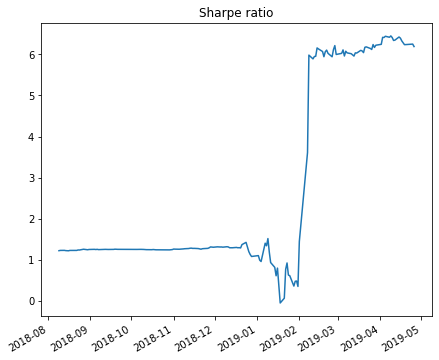

In [ ]:
new_port = portfolio_1
new_port['returns'] = new_port['portfolio_value'].pct_change(1)
# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    rf_rate = 0.01
    return (y.mean()*252 - rf_rate) / (y.std()*np.sqrt(252))

# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

plt.figure(figsize=(7,6))
new_port['rs'][252:].plot()
plt.title('Sharpe ratio')
plt.show()

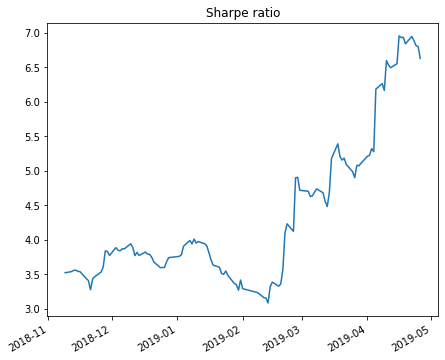

In [ ]:
new_port = portfolio_2
new_port['returns'] = new_port['portfolio_value'].pct_change(1)
# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    rf_rate = 0.01
    return (y.mean()*252 - rf_rate) / (y.std()*np.sqrt(252))

# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

plt.figure(figsize=(7,6))
new_port['rs'][252:].plot()
plt.title('Sharpe ratio')
plt.show()